In [28]:
#entrainement journalier - install the dependencies

import numpy as np
import pandas as pd
import matplotlib
%matplotlib inline
import seaborn as sns
from sklearn import linear_model
import requests


In [2]:
df=pd.read_csv("titanic_dataset.csv")

In [3]:
#preprocessing
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#si le ds est plus long :
df.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [5]:
#appréhensino du son DS
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
#remplacer des data
df['Age']=df['Age'].mean()

In [8]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df['Cabin']=df['Cabin'].fillna('Cabin_unknown')


In [10]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,8.910000e+02,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,2.969912e+01,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,3.554709e-15,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,2.969912e+01,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,2.969912e+01,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,2.969912e+01,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,2.969912e+01,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,2.969912e+01,8.000000,6.000000,512.329200


<Axes: >

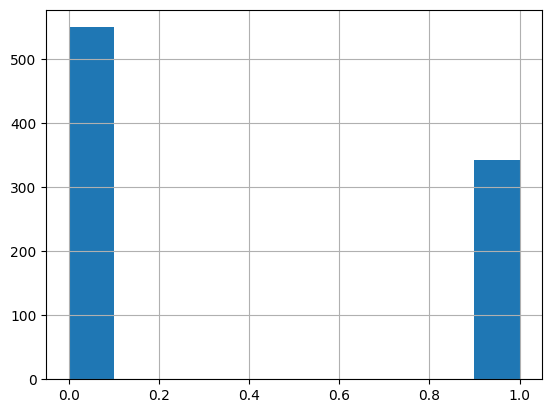

In [13]:
df['Survived'].hist()

In [14]:
# df = df[all_df["Year"] >= 1984] \
#     .groupby(["Country"]) \
#     .count()[["Medal"]] \
#     .sort_values(by="Medal", ascending=False) \
#     .rename(columns={'Medal':'Medal Count'})
# top_10_df = all_count_df.head(10)

In [15]:
pourcentagedesvivants=df.groupby('Pclass')['Survived'].sum()/(126+87+119)*100
print(f"{pourcentagedesvivants}%")

Pclass
1    40.963855
2    26.204819
3    35.843373
Name: Survived, dtype: float64%


In [16]:
df.groupby('Pclass')['Survived'].agg(['sum', 'mean', 'count'])

,sum,mean,count
Pclass,,,
1,136,0.629630,216
2,87,0.472826,184
3,119,0.242363,491


In [25]:
df.query('Survived>0')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,29.699118,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,29.699118,0,0,STON/O2. 3101282,7.9250,Cabin_unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,29.699118,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,29.699118,0,2,347742,11.1333,Cabin_unknown,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,29.699118,1,0,237736,30.0708,Cabin_unknown,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,29.699118,0,0,2667,7.2250,Cabin_unknown,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,29.699118,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,29.699118,0,1,230433,26.0000,Cabin_unknown,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,29.699118,0,0,112053,30.0000,B42,S


Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

In [29]:
#test sur un modèle de régressino linéaire


In [40]:
X=df[['Age']]
y=df['Survived']

reg = linear_model.LinearRegression()
reg.fit(X,y)
reg.predict([[29.6]])

/home/matthieumouillon/.pyenv/versions/3.12.9/envs/lewagon/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.38311201])

<Axes: xlabel='Age', ylabel='Survived'>

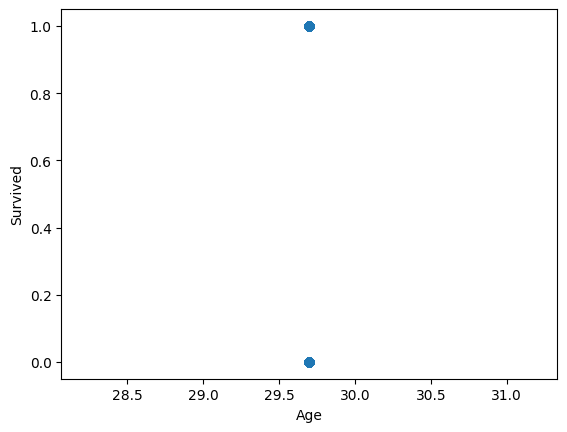

In [42]:
sns.regplot(data=df, y='Survived', x='Age', line_kws={'color':'r'})